## Suma y Adelgazamiento de Procesos Poisson

### Suma de Procesos Poisson
Sabemos que si $\{N_1(t)\}_{t \geq 0}$ y $\{N_2(t)\}_{t \geq 0}$ son Procesos Poisson de tasas $\lambda_1, \lambda_2 > 0$, entonces el proceso definido por $N(t) = N_1(t) + N_2(t)$ volvera a ser de Poisson con tasa $\lambda_1 + \lambda_2$. A continuación daremos una idea para simular la suma de dos procesos Poisson.

**Idea para simular suma de Procesos Poisson**
Suponemos que ya tenemos los tiempos de llegada de ambos procesos en listas llamadas $\texttt{llegadas1}$ y $\texttt{llegadas2}$, nuestro objetivo es construir una lista $\texttt{llegadas_suma}$, donde estén las llegadas del proceso a construir.

1. $\texttt{llegadas_suma}$ será la lista ordenada que resulte de concatenar $\texttt{llegadas1}$ y $\texttt{llegadas2}$

2. La lista de valores del proceso será el conjunto $\{0, 1, ..., \texttt{len}(\texttt{llegadas_suma})) \}$

Actualizaremos nuestra segunda función del código anterior para generar la suma de dos Procesos Poisson como éstos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson:
  # Recibe la tasa lambda
  def __init__(self, lamb):
    self.lamb = lamb
    self.proceso = pd.DataFrame()

  # Recibe un parámetro t y simulamos hasta ese tiempo
  def simular(self, t):
    llegadas = [0]
    # Mientras la suma no exceda t, genera una exponencial y la agrega a la lista
    while llegadas[-1] < t:
      ti = np.random.exponential(1/self.lamb)
      llegadas.append(llegadas[-1] + ti)
    # N es tal que N_t = N
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n':range(N), 'T_n':llegadas})
    #print(f'El proceso tiene {N} salto al tiempo {t}')
    return self.proceso

  # Graficamos el proceso igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    plt.step(self.proceso['T_n'], self.proceso['n'], where='post', color='navy')
    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='blue', zorder=3, s = 15)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()

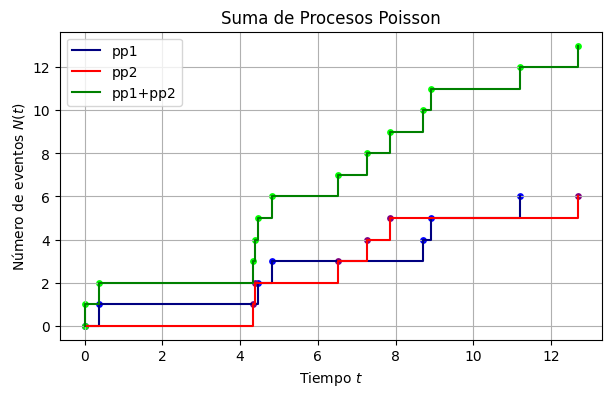

In [4]:
# Generamos los dos procesos base
pp1 = ProcesoPoisson(0.2)
pp2 = ProcesoPoisson(0.5)

# Generamos las trayectorias
pp1_datos = pp1.simular(10)
pp2_datos = pp2.simular(10)

# Hacemos el proceso suma
sum = list(pp1_datos['T_n']) + list(pp2_datos['T_n'])
pp_suma = pd.DataFrame({'n':range(0,len(sum)), 'T_n':sorted(sum)})

# Graficamos
plt.figure(figsize=(7,4))
plt.step(pp1_datos['T_n'], pp1_datos['n'], where='post', color='navy', label = 'pp1')
plt.scatter(pp1_datos['T_n'], pp1_datos['n'], color='blue', zorder=1, s=15)
plt.step(pp2_datos['T_n'], pp2_datos['n'], where='post', color='red', label = 'pp2')
plt.scatter(pp2_datos['T_n'], pp2_datos['n'], color='purple', zorder=1, s=15)
plt.step(pp_suma['T_n'], pp_suma['n'], where='post', color='green', label = 'pp1+pp2')
plt.scatter(pp_suma['T_n'], pp_suma['n'], color='lime', zorder=1, s=15)
plt.title('Suma de Procesos Poisson')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.legend()
plt.grid()
plt.show()



Ahora actualizaremos nuestra clase para incluir la suma de Procesos Poisson.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson:
  # Recibe la tasa lambda
  def __init__(self, lamb):
    self.lamb = lamb
    self.proceso = pd.DataFrame()
    # Añadimos lo siguiente al constructor, en caso de querer sumar
    self.pp_suma = pd.DataFrame()
    self.pp1 = pd.DataFrame()
    self.pp2 = pd.DataFrame()

  # Recibe un parámetro t y simulamos hasta ese tiempo
  def simular(self, t):
    llegadas = [0]
    # Mientras la suma no exceda t, genera una exponencial y la agrega a la lista
    while llegadas[-1] < t:
      ti = np.random.exponential(1/self.lamb)
      llegadas.append(llegadas[-1] + ti)
    # N es tal que N_t = N
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n':range(N), 'T_n':llegadas})
    #print(f'El proceso tiene {N} salto al tiempo {t}')
    return self.proceso

  # Graficamos el proceso igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    plt.step(self.proceso['T_n'], self.proceso['n'], where='post', color='navy')
    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='blue', zorder=3, s = 15)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()

  # Produce un proceso Poisson que será suma de dos procesos
  # T será el tiempo del proceso suma, cada uno será aproximadamente hasta T/2
  def sumandos(self, T, lamb1, lamb2):
    if lamb1 + lamb2 != self.lamb:
      raise Exception('Las tasas no coinciden')
    # Generamos nuestros procesos
    self.pp1 = ProcesoPoisson(lamb1)
    self.pp2 = ProcesoPoisson(lamb2)
    # Simulamos las trayectorias
    pp1_datos = self.pp1.simular(T//2)
    pp2_datos = self.pp2.simular(T//2)

    # Hacemos el data frame de la suma
    summ = list(pp1_datos['T_n']) + list(pp2_datos['T_n'])
    self.pp_suma = pd.DataFrame({'n':range(0,len(summ)), 'T_n':sorted(summ)})

    return self.pp_suma

  # Graficamos la suma
  def plot_suma(self):
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-dark')
    plt.step(self.pp1.proceso['T_n'], self.pp1.proceso['n'], where='post', color='navy', label='pp1')
    plt.scatter(self.pp1.proceso['T_n'], self.pp1.proceso['n'], color='blue', zorder=1, s=15)
    plt.step(self.pp2.proceso['T_n'], self.pp2.proceso['n'], where='post', color='red', label='pp2')
    plt.scatter(self.pp2.proceso['T_n'], self.pp2.proceso['n'], color='purple', zorder=1, s=15)
    plt.step(self.pp_suma['T_n'], self.pp_suma['n'], where='post', color='green', label='pp1+pp2')
    plt.scatter(self.pp_suma['T_n'], self.pp_suma['n'], color='lime', zorder=1, s=15)
    plt.title('Suma de Procesos Poisson')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()

# Esta función está fuera de la clase, es para sumar dos PP dadas sus tasas.
def sumar_procesos(T, lamb1, lamb2, graficar = True):
  pp1 = ProcesoPoisson(lamb1)
  pp2 = ProcesoPoisson(lamb2)
  # Generamos las trayectorias
  pp1_datos = pp1.simular(T)
  pp2_datos = pp2.simular(T)
  # Hacemos el proceso suma
  sum = list(pp1_datos['T_n']) + list(pp2_datos['T_n'][1:])
  pp_suma = pd.DataFrame({'n':range(0,len(sum)), 'T_n':sorted(sum)})
  if graficar:
    plt.figure(figsize=(7,4))
    plt.step(pp1_datos['T_n'], pp1_datos['n'], where='post', color='navy', label = 'pp1')
    plt.scatter(pp1_datos['T_n'], pp1_datos['n'], color='blue', zorder=1, s=15)
    plt.step(pp2_datos['T_n'], pp2_datos['n'], where='post', color='red', label = 'pp2')
    plt.scatter(pp2_datos['T_n'], pp2_datos['n'], color='purple', zorder=1, s=15)
    plt.step(pp_suma['T_n'], pp_suma['n'], where='post', color='green', label = 'pp1+pp2')
    plt.scatter(pp_suma['T_n'], pp_suma['n'], color='lime', zorder=1, s=15)
    plt.title('Suma de Procesos Poisson')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()
  # Devolvemos el dataframe de la suma
  return pp_suma

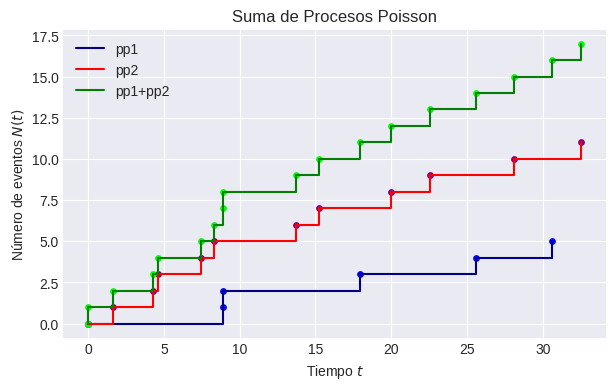

In [34]:
pp3 = ProcesoPoisson(0.7)
pp3.sumandos(60, 0.2, 0.5)
pp3.plot_suma()

Probemos la otra función

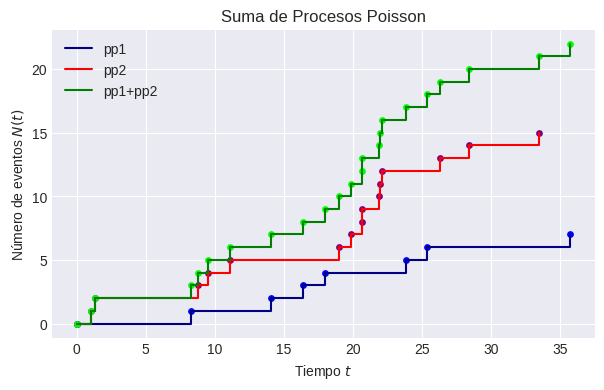

,n,T_n
0,0,0.000000
1,1,1.014701
2,2,1.287893
3,3,8.253640
4,4,8.761357
5,5,9.495780
6,6,11.069178
7,7,14.037982
8,8,16.348987
9,9,17.987031


In [37]:
pp4 = ProcesoPoisson(0.5)
pp5 = ProcesoPoisson(0.9)
sumar_procesos(30, 0.2, 0.5)

### Adelgazamiento de un Proceso Poisson

Sabemos que si al tener un Proceso Poisson $\{N(t)\}_{t \geq 0}$ y clasificamos a los elementos del tipo 1 con probabilidad p y del tipo 2 con probabilidad 1-p y si $\{N_i(t)\}_{t \geq 0}$ son los elementos del tipo $i = 1,2$, entonces cada uno de estos procesos vuelve a ser un Proceso Poisson de tasas $\lambda p$ y $\lambda (1-p)$ respectivamente.
Ahora simularemos este proceso de clasificación.

**Idea para simular el adelgazamiento de Procesos Poisson**

Supongamos que ya tenemos el proceso general con $K \in \mathbb{N}$ saltos. Buscamos generar otros dos conjuntos de variables aleatorias $\bar{S}_1, \bar{S}_2, ..., \bar{S}_N$ y $\hat{S}_1, \hat{S}_2, ..., \hat{S}_{K-N}$, donde las primeras sean los tiempos de ocurrencia del proceso $\{N_1(t)\}_{t \geq 0}$ y las segunda del proceso $\{N_2(t)\}_{t \geq 0}$.


1. Generar una muestra $\{X_i\}_{i = 1}^K \stackrel{i.i.d.}\sim Ber(p)$.
2. Definir las variables aleatorias:

$$ \bar{S}_1 = mín\{S_k : X_k = 1\} \\
 \bar{S}_2 = mín\{S_k > \bar{S_1} : X_k = 1\} \\
 \vdots \\
 \bar{S}_N = mín\{S_k > S_{N-1} : X_k = 1\}$$

donde $N \in \mathbb{N}$ es el número de saltos del primer proceso.

3. Usar a las variables $\bar{S}_1, \bar{S}_2, ..., \bar{S}_N$ como los tiempos de llegada del proceso Poisson de Parámetro $\lambda p$

4. Definir a las variables aleatorias:

$$ \hat{S}_1 = Y_{(1)} \\
 \hat{S}_2 = Y_{(2)} \\
 \vdots \\
 \hat{S}_{N-K} = Y_{(N-K)} $$

Donde las variables $Y_{(1)}, Y_{(2)}, ..., Y_{(N-K)}$ son los estadísticos de órden de la muestra $\{S_i : i \in \{1,...,K\}\} ∖  \{\bar{S}_i : i \in \{1,...,K-N\}\}$

5. Usar a las variables $\hat{S}_1, \hat{S}_2, ..., \hat{S}_N$ como los tiempos de llegada del proceso Poisson de Parámetro $\lambda (1-p)$

Ahora veamos esto en acción usando la Clase de Proceso Poisson que habíamos definido antes.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson_Ocurrencias:
  def __init__(self, t, n):
    self.t = t
    self.n = n
    self.saltos = pd.DataFrame()

  def simular(self):
    uniformes = np.random.uniform(0, self.t, self.n)
    uniformes.sort()
    self.saltos = pd.DataFrame({'n':range(self.n+1), 'T_n':np.concatenate([[0],uniformes])})
    return self.saltos

  def plot(self):
    plt.figure(figsize=(7,4))
    plt.style.use('seaborn-v0_8-dark')
    plt.step(self.saltos['T_n'], self.saltos['n'], where='post', color='navy')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='blue', zorder=1, s=15)
    plt.title('Proceso Poisson simulado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

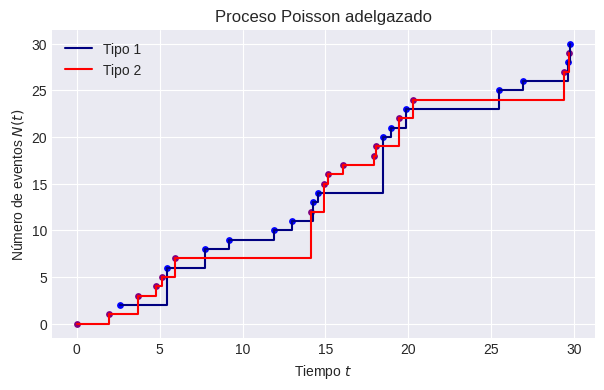

In [24]:
# Simulamos el proceso
proceso1 = ProcesoPoisson_Ocurrencias(30, 30)
saltos1 = proceso1.simular()

# Definimos los parámetros
K = len(saltos1)
p = 0.5

# Generamos la muestra de bernoullis
bernoulli = np.random.binomial(1, p, K)

# Guardamos los saltos de ambos tipos
saltos_tipo1 = saltos1[bernoulli == 1] # Buscamos los saltos en donde X_i = 1
saltos_tipo2 = saltos1[bernoulli == 0] # Buscamos los saltos en donde X_i = 0

# Graficamos los resultados
plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-dark')
plt.step(saltos_tipo1['T_n'], saltos_tipo1['n'], where='post', color='navy', label = 'Tipo 1')
plt.scatter(saltos_tipo1['T_n'], saltos_tipo1['n'], color='blue', zorder=1, s=15)
plt.step(saltos_tipo2['T_n'], saltos_tipo2['n'], where='post', color='red', label = 'Tipo 2')
plt.scatter(saltos_tipo2['T_n'], saltos_tipo2['n'], color='purple', zorder=1, s=15)
plt.title('Proceso Poisson adelgazado')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.legend()
plt.grid()
plt.show()


Ahora añadimos este código a nuestra clase $\texttt{ProcesoPoisson_Ocurrencias}$

In [25]:
class ProcesoPoisson_Ocurrencias:
  def __init__(self, t, n):
    self.t = t
    self.n = n
    self.saltos = pd.DataFrame()
    # Agregamos al constructor los data frames de tipo 1 y tipo 2
    self.saltos_tipo1 = pd.DataFrame()
    self.saltos_tipo2 = pd.DataFrame()

  def simular(self):
    uniformes = np.random.uniform(0, self.t, self.n)
    uniformes.sort()
    self.saltos = pd.DataFrame({'n':range(self.n+1), 'T_n':np.concatenate([[0],uniformes])})
    return self.saltos

  def plot(self):
    plt.figure(figsize=(7,4))
    plt.style.use('seaborn-v0_8-dark')
    plt.step(self.saltos['T_n'], self.saltos['n'], where='post', color='navy')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='blue', zorder=1, s=15)
    plt.title('Proceso Poisson simulado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

  def adelgazamiento(self, p):
    if self.saltos.empty:
      self.simular()
    K = len(self.saltos)
    # Generamos las bernoullis
    bernoulli = np.random.binomial(1, p, K)
    # Guardamos los saltos de ambos tipos
    self.saltos_tipo1 = self.saltos[bernoulli == 1] # Buscamos los saltos en donde X_i = 1
    self.saltos_tipo2 = self.saltos[bernoulli == 0] # Buscamos los saltos en donde X_i = 0
    return self.saltos_tipo1, self.saltos_tipo2

  # Graficamos el adelgazamiento
  def plot_adelgazamiento(self):
    plt.figure(figsize=(7,4))
    plt.style.use('seaborn-v0_8-dark')
    plt.step(self.saltos_tipo1['T_n'], self.saltos_tipo1['n'], where='post', color='navy', label = 'Tipo 1')
    plt.scatter(self.saltos_tipo1['T_n'], self.saltos_tipo1['n'], color='blue', zorder=1, s=15)
    plt.step(self.saltos_tipo2['T_n'], self.saltos_tipo2['n'], where='post', color='red', label = 'Tipo 2')
    plt.scatter(self.saltos_tipo2['T_n'], self.saltos_tipo2['n'], color='purple', zorder=1, s=15)
    plt.title('Proceso Poisson adelgazado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()

Ahora veamos algunos casos significativos

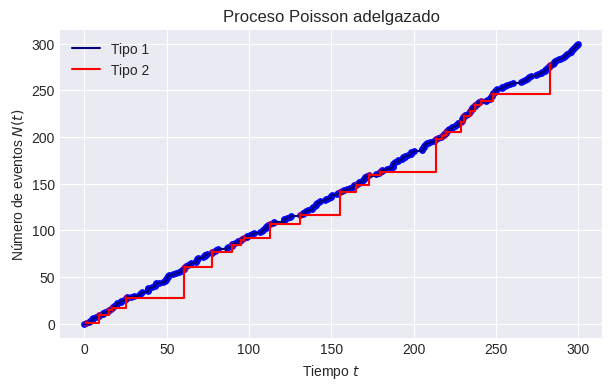

In [26]:
proceso2 = ProcesoPoisson_Ocurrencias(300, 300)
proceso2.simular()
proceso2.adelgazamiento(0.9)
proceso2.plot_adelgazamiento()

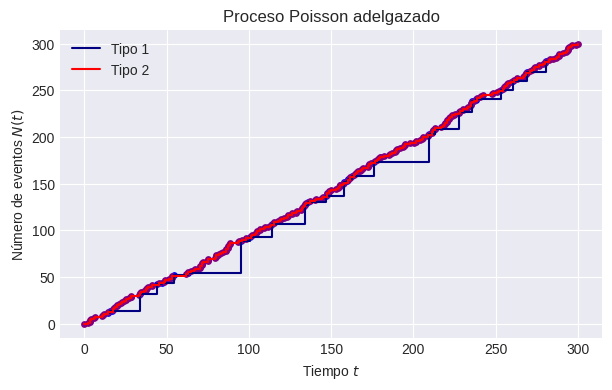

In [27]:
proceso3 = ProcesoPoisson_Ocurrencias(300, 300)
proceso3.simular()
proceso3.adelgazamiento(0.1)
proceso3.plot_adelgazamiento()
